**TOPIC: a**<br>
**Questions**<br>
**1. What data do you have?**<br>
answer<br><br>
**2. What would you like to know?**<br>
answer<br><br>
**3. Explore the data.**<br>
Generate statistics and perform visualizations. Explain what you are computing (mean, SD, ...), and then
compute using Python. Create some visualizations (at least 8, and at least 6
must be of different types); use Python.<br><br>
**4. Can you state any hypotheses or make predictions? Which tests can you apply to
verify your hypothesis? State clearly each of your hypotheses (at least 3).**<br>
answer<br><br>
**5. Test your hypotheses.**<br>
Test your hypotheses and predictions (use at least 2 different
tests). For each: i) describe the test you are using; ii) perform it; iii) analyze
the results and draw the conclusion. You must perform correlation analysis and chi-squared test.


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
df = pd.read_csv("Responses.csv")

In [59]:
df = df[['1. How old are you?',
         '2. To which gender identity do you most identify?',
         '62. On average, how many hours do you listen to music per day?', 
         '68. Which social media platforms do you use most often?', 
         '69. What is your favorite genre of music?', 
         '70. In which of the following situations do you listen to music?', 
         '71. Which music streaming service do you use the most?']]
df = df.rename(columns={'1. How old are you?': 'Age', 
                        '2. To which gender identity do you most identify?': 'Gender', 
                        '62. On average, how many hours do you listen to music per day?': 'Daily_Music_Consumption', 
                        '68. Which social media platforms do you use most often?': 'Preferred_Social_Medias', 
                        '69. What is your favorite genre of music?': 'Music_Genre', 
                        '70. In which of the following situations do you listen to music?': 'Occasion', 
                        '71. Which music streaming service do you use the most?': 'Preferred_Music_Platform'})
df.loc[~df['Gender'].isin(['Man', 'Woman']), 'Gender'] = 'Other'
df.loc[df['Music_Genre'] == "Breakcore", 'Music_Genre'] = "Electronic"
df.loc[df['Music_Genre'] == "Bladee", 'Music_Genre'] = "Hip Hop / Rap"
df.loc[df['Music_Genre'] == "Funk", 'Music_Genre'] = "Pop"
df.loc[df['Music_Genre'] == "House", 'Music_Genre'] = "Electronic"
df.loc[df['Music_Genre'] == "I have no favorite", 'Music_Genre'] = "No preference"
df.loc[df['Music_Genre'] == "Lofi", 'Music_Genre'] = "Other"

In [60]:
df.loc[df['Music_Genre'] == "Most genres like anime, jpop, edm, hip hop, kpop, pop, r&b, lofi", 'Music_Genre'] = "Anime / Jpop"
df.loc[df['Music_Genre'] == "Musical Theater", 'Music_Genre'] = "Other"
df.loc[df['Music_Genre'] == "Phonk", 'Music_Genre'] = "Electronic"
df.loc[df['Music_Genre'] == "Salsa music", 'Music_Genre'] = "Other"
df.loc[df['Music_Genre'] == "Soundtrack ", 'Music_Genre'] = "Other"
df.loc[df['Music_Genre'] == "Video Game", 'Music_Genre'] = "Other"
df.loc[df['Music_Genre'] == "any, whatever sounds good to my ear", 'Music_Genre'] = "No preference"
df.loc[df['Music_Genre'] == "electronic pop ", 'Music_Genre'] = "Electronic"
df.loc[df['Music_Genre'] == "idk", 'Music_Genre'] = "No preference"
df.loc[df['Music_Genre'] == "indie pop", 'Music_Genre'] = "Indie / Alternative"
df.loc[df['Music_Genre'] == "multi", 'Music_Genre'] = "Other"
df.loc[~df['Gender'].isin(['Man', 'Woman']), 'Gender'] = 'Other'
df = df[df['Daily_Music_Consumption'] <= 24]
def categorize_hours(hours):
    if hours <= 2:
        return '0-2'
    elif hours <= 5:
        return '3-5'
    elif hours <= 8:
        return '6-8'
    else:
        return '8+'

df['Hours_Cohort'] = df['Daily_Music_Consumption'].apply(categorize_hours)

def categorize_age(ages):
    if ages <= 20:
        return '19 to 20'
    elif ages <= 22:
        return '21 to 22'
    elif ages <= 24:
        return '23 to 24'
    else:
        return '24+'
df['Age_Cohort'] = df['Age'].apply(categorize_age)

**ANALYSIS OF GENDER AND MUSIC PREFERENCE**<br>

**We noticed some interesting characteristics of the breakdown of Gender and Music taste. It seems that males strongly prefer rap/hiphop while females prefer Indie/Alternative. Below is a chart showing the breakdown of music tastes and gender.**

<AxesSubplot:xlabel='Gender'>

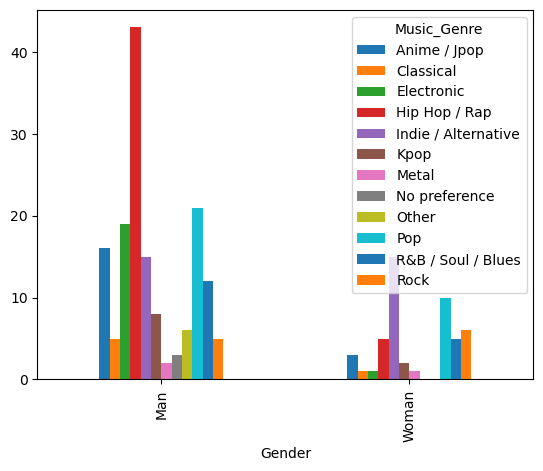

In [63]:
##Breakdown of Prefered Genre by Gender(notice Rap vs Indie )
df3=df.query("Music_Genre != ('Other', 'No preference')")
df3=df.query("Gender != 'Other'")
table_4 = pd.pivot_table(data = df3, values = 'Age', columns = 'Music_Genre', index = 'Gender', aggfunc = 'count' )
table_4.loc [ [ 'Man' , 'Woman' ] ].plot(kind = 'bar')

**ANALYSIS OF GENDER AND MUSIC PREFERENCE**<br>

**If we look at the sample of males, we see that the top 3 genres are hip hop/Rap, Pop, and Electronic music. When we look at the female sample, the top 3 genres are Indie/Alternative, Pop, and Rock music. Below we see a numbers breakdown to accompany the graph**

In [64]:
Gender_Genre_counts = df3.pivot_table(
    index="Gender", columns="Music_Genre",
    values="Age",  # We can pretty much count any column, as long as there are no NaNs.
    aggfunc="count", # The count function will count the number of non-null values.
    fill_value=0
    
)
Gender_Genre_counts

Music_Genre,Anime / Jpop,Classical,Electronic,Hip Hop / Rap,Indie / Alternative,Kpop,Metal,No preference,Other,Pop,R&B / Soul / Blues,Rock
Gender,,,,,,,,,,,,
Man,16,5,19,43,15,8,2,3,6,21,12,5
Woman,3,1,1,5,15,2,1,0,0,10,5,6


**ANALYSIS OF GENDER AND MUSIC PREFERENCE**<br>

**Looking at the bar graph and at table above, it seems easy to conclude that males are significantly more likley to choose Hip Hop / Rap than females. However, we must also consider that a large proportion of the sample pupulation is male. Below is a chart depicting the disparity. About 76% of respondants are male while only about 23% are female.**

([<matplotlib.patches.Wedge at 0x7f97b76a98b0>,
 [Text(-0.8122510711100778, 0.741787164542857, 'Man'),
  Text(0.8122510711100778, -0.7417871645428571, 'Woman')],
 [Text(-0.4430460387873151, 0.4046111806597401, '76.4%\n159'),
  Text(0.4430460387873151, -0.40461118065974017, '23.6%\n49')])

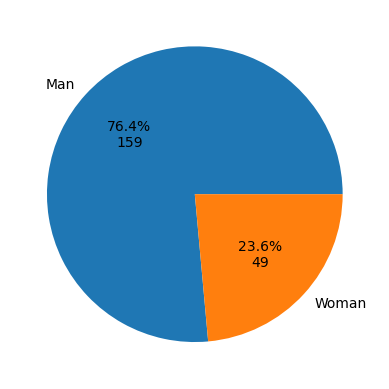

In [65]:
total = df3['Gender'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df3['Gender'].value_counts().values, labels=df3['Gender'].value_counts().index, autopct=fmt)

**ANALYSIS OF GENDER AND MUSIC PREFERENCE**<br>

**Looking at the bar graph and at the numbers breakdown, it seems easy to conclude that males are significantly more likley to choose Hip Hop / Rap than females. However, we must also consider that a large proportion of the sample pupulation is male. Below is a chart depicting the disparity. About 76% of respondants are male while only about 23% are female. We may find a better picture by looking at the conditional relationship of the top picked genres.**

In [66]:
df4=df3.query("Music_Genre == ('Hip Hop / Rap', 'Pop', 'Electronic', 'Indie / Alternative', 'Rock')")
Gender_Genre_counts2 = df4.pivot_table(
    index="Gender", columns="Music_Genre",
    values="Age",  
    aggfunc="count", 
    fill_value=0
    
)
Genre_counts = Gender_Genre_counts2.sum(axis=1)
Genre_Given_Gender = Gender_Genre_counts2.divide(Genre_counts, axis=0)
Genre_Given_Gender

Music_Genre,Electronic,Hip Hop / Rap,Indie / Alternative,Pop,Rock
Gender,,,,,
Man,0.184466,0.417476,0.145631,0.203883,0.048544
Woman,0.027027,0.135135,0.405405,0.270270,0.162162


**ANALYSIS OF GENDER AND MUSIC PREFERENCE**<br>

**Looking at the probailities, we see that Males are indeed more likley to choose Rap and Electronic while females are more likley to choose Alternative and Rock music. It looks like the probabilities are close to even with pop music. We can run a few tests to discover any correlations we seem to be observing.**

<AxesSubplot:xlabel='Gender'>

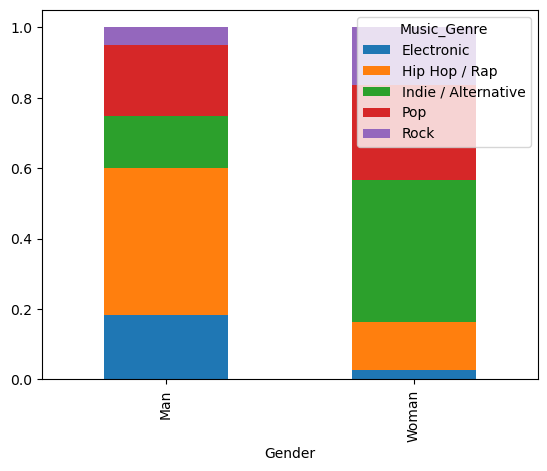

In [67]:
Genre_Given_Gender.plot.bar(stacked=True)

In [68]:

df4 = df4.replace({"Gender":{'Man': 0, 'Woman': 1}})
df4 = df4.replace({"Music_Genre":{'Hip Hop / Rap': 0, 'Indie / Alternative': 1, 'Pop': 2, 'Electronic': 3, 'Rock': 4}})
Gender_Genre_counts4 = df4.pivot_table(
    index="Gender", columns="Music_Genre",
    values="Age",  
    aggfunc="count", 
    fill_value=0
    
)
Gender_Genre_counts4

Music_Genre,0,1,2,3,4
Gender,,,,,
0,43,15,21,19,5
1,5,15,10,1,6


**ANALYSIS OF GENDER AND MUSIC PREFERENCE**<br>

**Our hypothesis is that there is a correlation between prefered genre of music, and the respondant's gender. After converting our data types to integers, we find that the pearson Correlation is 0.12736. Which doesnt look too promising for our hypothesis. Although there is an indication that we have a weak positive correlation.**

In [89]:
df4.Music_Genre.corr(df4.Gender, method = 'pearson')

0.12736704475092678

**ANALYSIS OF GENDER AND MUSIC PREFERENCE**<br>

**Our null hypothesis is that Gender and the top Music Choices are independent. With 2 rows and 5 columns in our dataset, we have that (R-1)(C-1) = 4 degrees of freedom. We have a very small p value meaning that this chi squared value would have a small likleyhood of ocurring by chance. Convention states that we should use a significance level of 0.05 to determine the critical value. With 4 degrees of freedom, our critical value is 9.488. Since our chi squared value is 24.639, which is greater than our critical value, we can reject the null hypothesis. Based on this test, gender and music genre are correlated.**

In [70]:
from scipy.stats import chi2_contingency
chi, p, dfree, expected = chi2_contingency(Gender_Genre_counts4)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

calculated chi square value:  24.63909586208365
calculated p value:  5.945355100764131e-05
degree of freedom:  4


**ANALYSIS OF GENDER AND MUSIC PREFERENCE**<br>

**However this is only taking into consderation the top music choices by gender. Perhaps if we consider all genre choices, we will get a different answer. Below we conduct another chi squared test using an earlier pivot table containing all genre choices. The result however, is still a correlation. With 11 degrees of freedom, our critical value is 19.675 and our chi squared value is 30.925. We cannot reject the null hypothesis and it seems that gender and music choice is correlated. We would need a P value smaller than 0.001 to accept the null hypothesis.**

In [71]:
from scipy.stats import chi2_contingency
chi, p, dfree, expected = chi2_contingency(Gender_Genre_counts)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)


calculated chi square value:  30.925875125398804
calculated p value:  0.0011317929065310145
degree of freedom:  11


**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Below is a chart which pairs age with hours spent listening to music. At a glance, it seems to demonstrate a negative correlation between the two variables. Notice that the oldest cohort does not report listening to more than 8 hours of music per day. It seems that the older a respondant is, the lower their daily music consumption will be.**

<AxesSubplot:xlabel='Hours_Cohort'>

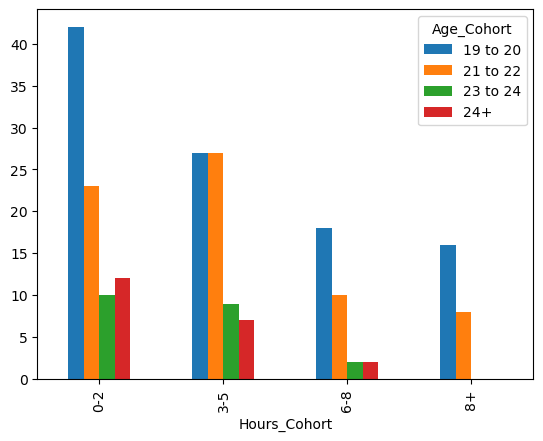

In [72]:
##Hours vs age cohort, there is a slight negative correlation between Age and Hours
table_7 = pd.pivot_table(data = df, values = 'Age', columns = 'Age_Cohort', index = 'Hours_Cohort', aggfunc = 'count' )
table_7.plot(kind = 'bar')

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**We can show the raw numbers better in a pivot table hilighting the two varibles. It seems here as well that the older repondants reported less music consumption per day. We concede that the number of older repondants is dwarfed by the younger cohorts. In the following cells, we take the joint probability and visualize it on a heat map to gain further insight.**

In [73]:
Hours_Age_counts = df.pivot_table(
    index="Age_Cohort", columns="Hours_Cohort",
    values="Age",  # We can pretty much count any column, as long as there are no NaNs.
    aggfunc="count", # The count function will count the number of non-null values.
    fill_value=0
    
)
Hours_Age_counts

Hours_Cohort,0-2,3-5,6-8,8+
Age_Cohort,,,,
19 to 20,42,27,18,16
21 to 22,23,27,10,8
23 to 24,10,9,2,0
24+,12,7,2,0


In [74]:
print(Hours_Age_counts.sum().sum())
joint = Hours_Age_counts / Hours_Age_counts.sum().sum()
joint

213


Hours_Cohort,0-2,3-5,6-8,8+
Age_Cohort,,,,
19 to 20,0.197183,0.126761,0.084507,0.075117
21 to 22,0.107981,0.126761,0.046948,0.037559
23 to 24,0.046948,0.042254,0.009390,0.000000
24+,0.056338,0.032864,0.009390,0.000000


In [75]:
joint.sum(axis=1)

Age_Cohort
19 to 20    0.483568
21 to 22    0.319249
23 to 24    0.098592
24+         0.098592
dtype: float64

In [76]:
joint.sum(axis=0)

Hours_Cohort
0-2    0.408451
3-5    0.328638
6-8    0.150235
8+     0.112676
dtype: float64

In [77]:
pd.crosstab(df.Age_Cohort, df.Hours_Cohort,
            normalize=True, margins=True)

Hours_Cohort,0-2,3-5,6-8,8+,All
Age_Cohort,,,,,
19 to 20,0.197183,0.126761,0.084507,0.075117,0.483568
21 to 22,0.107981,0.126761,0.046948,0.037559,0.319249
23 to 24,0.046948,0.042254,0.009390,0.000000,0.098592
24+,0.056338,0.032864,0.009390,0.000000,0.098592
All,0.408451,0.328638,0.150235,0.112676,1.000000


**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Below we have a heat map of the joint probability. Note that given a random survey respondant, they are most likely a 19-20 year old who listens to 0-2 hours of music per day. That is to say, they are the largest subgroup of respondants shown on the heat map. Generally, it seems that you have a very low probability of being in the older cohort and listening to alot of music.**

<AxesSubplot:xlabel='Hours_Cohort', ylabel='Age_Cohort'>

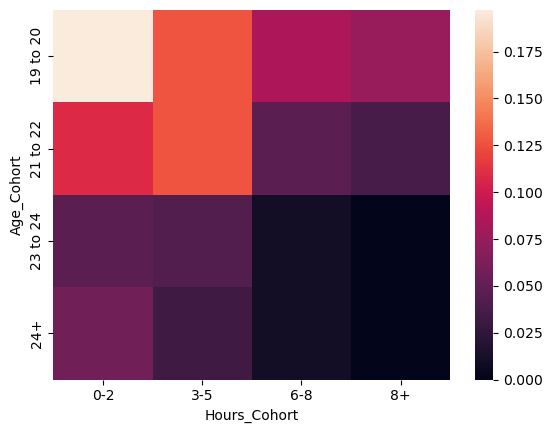

In [78]:
import seaborn as sns

sns.heatmap(joint)

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Here we examine the conditional probability between the hours and age cohorts. We calculate the probability of one variable given the other and represent that data with a stacked bar graph.**

In [79]:
Hours_counts = Hours_Age_counts.sum(axis=1)
Hours_Given_Age = Hours_Age_counts.divide(Hours_counts, axis=0)
Hours_Given_Age

Hours_Cohort,0-2,3-5,6-8,8+
Age_Cohort,,,,
19 to 20,0.407767,0.262136,0.174757,0.155340
21 to 22,0.338235,0.397059,0.147059,0.117647
23 to 24,0.476190,0.428571,0.095238,0.000000
24+,0.571429,0.333333,0.095238,0.000000


**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Here it seems abundantly clear that older respondants spend less time listening to music. There is a zero percent chance that a person 23+ is listening to more than 8 hours of music. We also see that the older cohorts are more likley to report the lowest number of hours listening to music.**

<AxesSubplot:xlabel='Age_Cohort'>

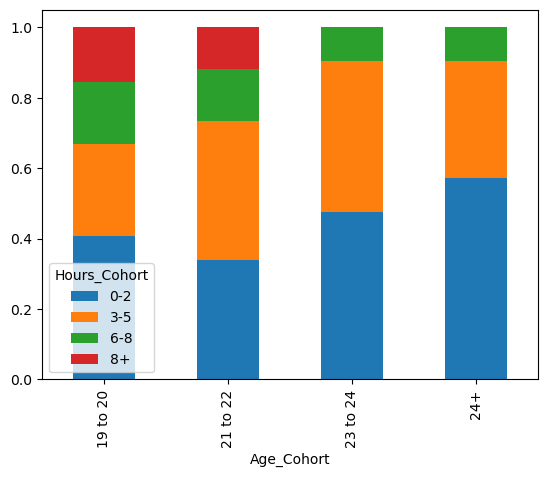

In [80]:
Hours_Given_Age.plot.bar(stacked=True)

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Our initial exploration of the data seems to indicate that these two variables are related. Our hypothesis is that music consumption is negativley correlated with the age of the survey respondant. We will test this hypotheis using the pearson correlation test and the chi-squared test.**

In [81]:
# calculate the pearson's correlation between Age and Music Consumption
df.Daily_Music_Consumption.corr(df.Age, method = 'pearson')

-0.14501744349977708

**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**The pearson correlation coefficient (r) is about -0.145, indicating a weak negative correlation between age and music consumption. This does not look brilliant for our hypothesis but a weak corelation is still indicated. The chi squared test will indicate if our findings are statistically relevant.**

In [82]:
Hours_Age_counts

Hours_Cohort,0-2,3-5,6-8,8+
Age_Cohort,,,,
19 to 20,42,27,18,16
21 to 22,23,27,10,8
23 to 24,10,9,2,0
24+,12,7,2,0


**ANALYSIS OF AGE AND HOURS SPENT LISTENING TO MUSIC**<br>

**Our null hypothesis is that Age and Music Consumption are independent. With 4 rows and 4 columns in our dataset, we have that (R-1)(C-1) = 9 degrees of freedom. We have a p vlue of 0.1585 meaning that this chi squared value would occurr by chance about 15% of the time. Convention states that we should use a significance level of 0.05 to determine the critical value. With 9 degrees of freedom, our critical value is 16.919. Since our chi squared value is 13.09, and less than the critical value, we cannot reject the null hypothesis. Based on this test, these two variables are independent.**

In [83]:
from scipy.stats import chi2_contingency
chi, p, dfree, expected = chi2_contingency(Hours_Age_counts)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)
##So We need an alpha value of 0.1585 to reject the null hypothesis. Since convention seems to indicate that
#an alpha of 0.05 should be used, We cannot reject the null hypothesis, meaning that the variables are independent. 

calculated chi square value:  13.090384443867936
calculated p value:  0.15855893286220168
degree of freedom:  9


TypeError: unsupported operand type(s) for /: 'str' and 'int'

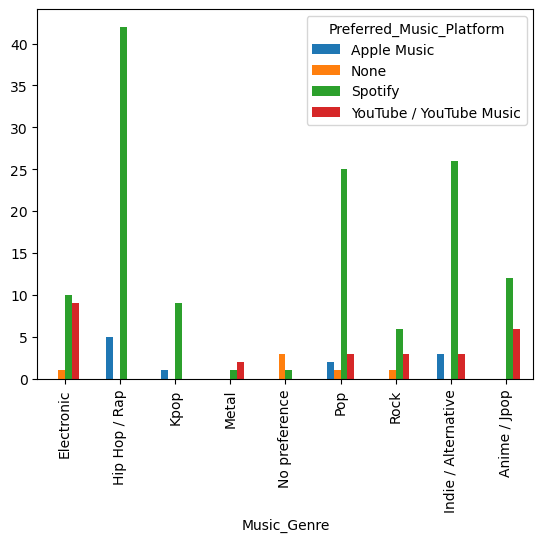

In [95]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
##Music Platform vs Genre, probably nothing here 
table_5 = pd.pivot_table(data = df2, values = 'Age', columns = 'Preferred_Music_Platform', index = 'Music_Genre', aggfunc = 'count' )
table_5.loc [ [ 'Electronic' , 'Hip Hop / Rap' , 'Kpop' , 'Metal', 'No preference', 'Pop' , 'Rock', 'Indie / Alternative', 'Anime / Jpop',    ] ].plot(kind = 'bar')

df2 = df2.replace({"Prefered_Music_Platform":{'Spotify': 0, 'Apple Music': 1, 'Youtube / Youtube Music':2,'None':3}})
# To plot the waffle Chart
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    values = df2.Preferred_Music_Platform,
    labels = list(df2.Music_Genre)
)
